# 阈值分割

In [2]:
import os

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

import configuration.config as config

In [3]:
# 创建输出路径
path = 'images/output1'

if not os.path.exists(path):
    os.makedirs(path)
    print(f'路径 {path} 已创建')
else:
    print(f'路径 {path} 已存在')

路径 images/output1 已存在


灰度图像在图像处理和计算机视觉任务中非常常用，因为它们简化了计算。灰度图像去除了颜色信息，只保留亮度信息，使得某些图像处理任务（如边缘检测、阈值分割等）变得更简单。

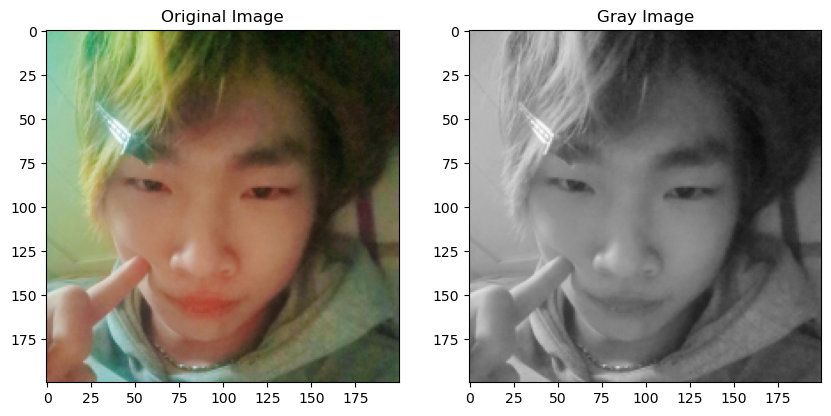

In [4]:
# 导入图像
img_bgr = cv.imread(filename=config.TEST_IMAGE, flags=cv.IMREAD_COLOR)
img_gray = cv.cvtColor(src=img_bgr, code=cv.COLOR_BGR2GRAY)

# 显示图像
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(cv.cvtColor(img_gray, cv.COLOR_BGR2RGB)), plt.title('Gray Image')
plt.show()

## 单阈值分割

### 设置阈值
选择一个合适的阈值。这个值可以通过实验确定，或者使用一些方法（例如 Otsu’s 方法）自动确定。

In [5]:
# 选择阈值
threshold_value = 111

### 应用阈值

In [7]:
# 应用阈值

# return thresholding value, destination = cv.threshold(src, thresh, maxval, type)
# type:
# cv.THRESH_BINARY: 如果像素值大于或等于 thresh，则设置为 maxval；否则设置为 0。
# cv.THRESH_BINARY_INV: 如果像素值小于 thresh，则设置为 maxval；否则设置为 0。
# cv.THRESH_TRUNC: 如果像素值大于 thresh，则将像素值设置为 thresh；否则保持不变。
# cv.THRESH_TOZERO: 如果像素值大于 thresh，则保持原值；否则设置为 0。
# cv.THRESH_TOZERO_INV: 如果像素值小于 thresh，则保持原值；否则设置为 0。

_, binary_image = cv.threshold(
    src=img_gray, thresh=threshold_value, maxval=255, type=cv.THRESH_BINARY
)

In [8]:
# # 显示原图和阈值分割图像
# cv.imshow('Original Image', image)
# cv.imshow('Binary Image', binary_image)

# # 保存处理后的图像
# # cv.imwrite('binary_image.jpg', binary_image)

# # 等待用户按键，然后关闭所有窗口
# cv.waitKey(0)
# cv.destroyAllWindows()

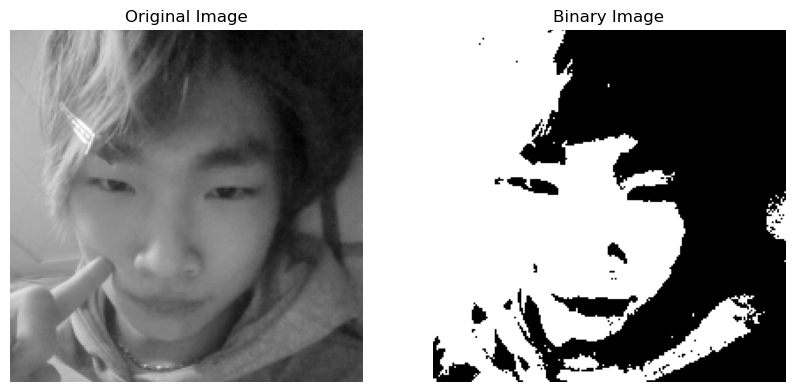

In [9]:
# 显示原图和阈值分割图像
plt.figure(figsize=(10, 5))

# 显示原图
plt.subplot(121)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# 显示阈值分割图像
plt.subplot(122)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

# 显示图像
plt.show()

# 保存处理后的图像
plt.imsave('images/output1/binary_image.png', binary_image, cmap='gray')

### 应用掩码


In [10]:
# 将二值图像转换为布尔掩码
mask = binary_image.astype(bool)

# 确保掩码的形状与原始图像一致
mask = np.stack([mask] * 3, axis=-1)

# 使用掩码提取前景
foreground = np.where(mask, img_bgr, 0)

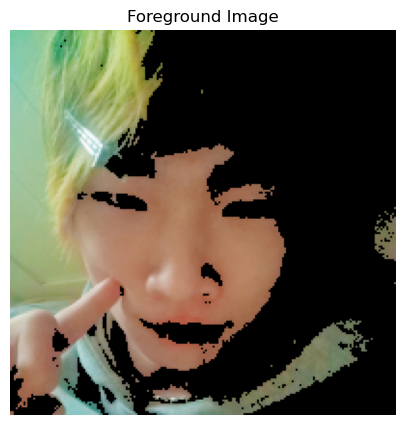

True

In [11]:
# 显示前景图像
plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))  # 转换为 RGB 以便在 matplotlib 中显示
plt.title('Foreground Image')
plt.axis('off')
plt.show()
# 保存前景图像
cv.imwrite('images/output1/foreground_image.png', foreground)

### Alpha通道

In [ ]:
# 创建一个与原图像大小相同的 alpha 通道，初始值为 255
alpha_channel = np.ones((img_bgr.shape[0], img_bgr.shape[1]), dtype=np.uint8) * 255

# 将 alpha 通道添加到原图像中
image_with_alpha = np.dstack(
    [
        img_bgr,
        alpha_channel,
    ]
)


# 检查图像是否包含 alpha 通道
if image_with_alpha.shape[2] == 4:
    rgb_image = image_with_alpha[:, :, :3]
    alpha_channel = image_with_alpha[:, :, 3]
else:
    raise ValueError("图像没有 alpha 通道")

print(image_with_alpha.shape)  # 4

In [ ]:
# 将二值图像转换为布尔掩码
mask2 = binary_image.astype(bool)

# 根据掩膜调整 alpha 通道
alpha_channel = (alpha_channel * mask2).astype(np.uint8)

image_with_alpha = np.dstack([rgb_image, alpha_channel])

# 保存结果
cv.imwrite('images/output1/adjusted_image_with_alpha.png', image_with_alpha)

In [ ]:
# 读取调整后的图像
image_with_alpha = cv.imread('images/output1/adjusted_image_with_alpha.png', cv.IMREAD_UNCHANGED)

# 分离 RGB 和 alpha 通道
rgb_image = image_with_alpha[:, :, :3]
alpha_channel = image_with_alpha[:, :, 3]

# 显示图像
plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(image_with_alpha, cv.COLOR_BGRA2RGBA))
plt.title('Adjusted Image with Alpha Channel')
plt.axis('off')
plt.show()